<a href="https://colab.research.google.com/github/mechamrit/StockAnalysis/blob/master/stocks3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3
In this module we will use linear Regeression. 

In [0]:
## Importing the Libraries

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import pandas_datareader.data as pdr
from datetime import datetime,timedelta

In [0]:
## Importing file gold.csv
## Go to this link to download the file https://drive.google.com/open?id=1ELlWFcIhN8Hjl44sD6CMqtnqIHIs-1Bi
## Upload the file
from google.colab import files
uploaded = files.upload()

This file  contains the data of the last 2 years price action of Indian (MCX) gold standard and have two columns pred and new where one of the column is partially filled use regressors to fill the missing values and also one of the column is polynomial combinationn of OHCL i.e. open,high,close,low prices. So lets deal with this.

In [0]:
df = pd.read_csv('GOLD.csv',parse_dates=True,index_col=0)
df.head(3)

In [0]:
%matplotlib inline
df.Price.plot()

In [0]:
## Lets have a scatter plot of both the columns that we have to work upon
fig= plt.figure(figsize=(10,3))
axes= fig.add_axes([1,1,1,1])
axes.scatter(x=df.index,y=df.Pred)

In [0]:
fig= plt.figure(figsize=(10,3))
axes= fig.add_axes([1,1,1,1])
axes.scatter(x=df.index,y=df.new)

In [0]:
## Checking Pred for null values
predNull = df[df.Pred.isnull()]
prednonNull = df[~df.Pred.isnull()]
display(prednonNull.head(3),predNull.head(3))

### Training for the 'pred' Column

In [0]:
## Assigning the Values for Training
X = prednonNull[['Price','Open','High','Low']]
y = prednonNull.Pred

## Now splitting the data for training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

## Now Applying Linear Model 
model = LinearRegression()
model.fit(X_train,y_train)

# Predict
y_predicted = model.predict(X_test)


rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse*100)
print('R2 score: ', r2)

Slope: [ 2.  3. -1. -4.]
Intercept: 2.05773176276125e-11
Root mean squared error:  5.90188384040847e-21
R2 score:  1.0


[]

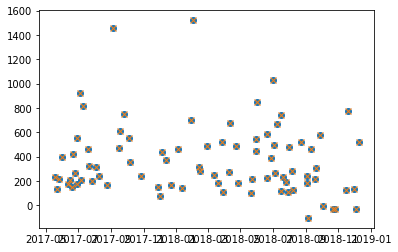

In [0]:
a = pd.DataFrame(y_predicted)
# data points

fig , ax = plt.subplots()
ax.plot(y_test.index ,a.values ,'o')
ax.plot(y_test.index ,y_test.values ,'x')
plt.plot()


## We can see that approx every value is overlapping therefore almost same.

In [0]:
### PREDICTING THE VALUE

xpredict = df[['Price','Open','High','Low']]
ypredict = model.predict(xpredict)
df.Pred = ypredict
df.isnull().values.any()


False

## Training for the 'new' column

### Using linear regression

In [0]:
## Now lets train model for new column
## Assigning the values we have

x1 = df[['Price','Open','High','Low']]
y1 = df.new

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=32)

model1 = LinearRegression()
model1.fit(X1_train,y1_train)

y1predict = model1.predict(X1_test)

# model evaluation
rmse1 = mean_squared_error(y1_test, y1predict)
r21 = r2_score(y1_test, y1predict)

# printing values
print('Slope:' ,model1.coef_)
print('Intercept:', model1.intercept_)
print('Root mean squared error: ', rmse1*100)
print('R2 score: ', r21)

### Using Polynomial Features
Lower the rmse Value better the fit is 
But we got 20% which is not optimum so we will try polynomial 

In [0]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly_train = polynomial_features.fit_transform(X1_train)
x_poly_test = polynomial_features.fit_transform(X1_test)
model3 = LinearRegression()
model3.fit(x_poly_train, y1_train)
y_poly_pred = model3.predict(x_poly_test)

rmse2 = np.sqrt(mean_squared_error(y1_test,y_poly_pred))
r22 = r2_score(y1_test,y_poly_pred)
# printing values
print('Slope:' ,model3.coef_)
print('Intercept:', model3.intercept_)
print('Root mean squared error: ', rmse2*100)
print('R2 score: ', r22)

Slope: [ 0.00000000e+00  1.01130808e+00 -1.00044090e+00  1.00481408e+00
 -1.01574695e+00  1.67967817e-07 -1.15633457e-06  3.28375419e-05
 -3.23847148e-05 -5.50020408e-07  8.27571032e-07  1.44559470e-06
 -1.84659417e-07 -3.34556920e-05  3.24545467e-05]
Intercept: 0.3302450695405241
Root mean squared error:  1.6030630889781325
R2 score:  0.9999999929540891


As we can see that RMSE is only 1.6% which is quite good so our model is working fine.

##[CAPM](https://www.investopedia.com/terms/c/capm.asp)
Analysis and Beta Calculation using regression -</br>
CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk.</br></br>
The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index).

For india its NIFTY for NSE and Sensex for BSE. Here we will use S&P 500

In [5]:
## Lets load the stock data
## We will load the five stocks in dataframe
##datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
start = datetime(2018 , 7 ,1)
end = datetime(2019, 7 , 1)

## Reading data and saving only Close Price in other data frame.
data = pdr.DataReader(['NVDA','^GSPC'],'yahoo',start,end)
db = data.Close
db.head(3)

Symbols,NVDA,^GSPC
Date,,
2018-07-02,242.240005,2726.709961
2018-07-03,236.839996,2713.219971
2018-07-05,242.729996,2736.610107


In [7]:
## Checking the null values 
db.isnull().values.any()

## Else we can drop or replace values by mean or other stats method

False

### Using Stats Model API

In [10]:
import statsmodels.api as sm


## Calculating Date For Past Three Months
# today = datetime.now()
# past = today - timedelta(days=90)
# past
## This is the code if we have updated data but we do not have 
## Note: --Therefore i will use the last value as the today
today = db.index.max()
past = today - timedelta(days=90)
mon3 = db[past:today]
display(today,past,mon3.head(3))

Timestamp('2019-07-01 00:00:00')

Timestamp('2019-04-02 00:00:00')

Symbols,NVDA,^GSPC
Date,,
2019-04-02,183.000000,2867.239990
2019-04-03,188.619995,2873.399902
2019-04-04,188.259995,2879.389893


In [11]:
## Calculating the Daily Returns
return_daily = mon3.pct_change(1)
return_daily.columns=['NVDA','^GSPC']
return_daily.dropna(inplace=True)
return_daily.head(5)

,NVDA,^GSPC
Date,,
2019-04-03,0.030710,0.002148
2019-04-04,-0.001909,0.002085
2019-04-05,0.014289,0.004636
2019-04-08,0.004399,0.001047
2019-04-09,-0.013192,-0.006067


In [14]:
x = return_daily.NVDA
y = return_daily['^GSPC']

## Applying the Model
x1 = sm.add_constant(x)


## Regression Model
model = sm.OLS(y,x1)

results = model.fit()
print(results.summary())
print('Beta for our model is',results.params)


                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     47.96
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           3.36e-09
Time:                        17:09:54   Log-Likelihood:                 236.49
No. Observations:                  62   AIC:                            -469.0
Df Residuals:                      60   BIC:                            -464.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.208      0.2

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
## Calculating Monthly Beta value

## This Method is deprecated 
# g = db.resample('M',how='mean')

## Therefore we will use the Grouper with group_by 
monval = db.groupby(pd.Grouper(freq='M')).mean()
monval.columns = ['NVDA','^GSPC']


## Now using linear OMS
month_return = monval.pct_change()
month_return.dropna(inplace=True)
month_return.head(3)


x2 = month_return.NVDA
y2 = month_return['^GSPC']


x3 = sm.add_constant(x2)
model1 = sm.OLS(y2 , x3)
result = model1.fit()

print(result.summary())
print('The Beta is ' , result.params)

                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     26.77
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           0.000417
Time:                        17:15:52   Log-Likelihood:                 32.278
No. Observations:                  12   AIC:                            -60.56
Df Residuals:                      10   BIC:                            -59.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.005      2.076      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


### Using SciPy

In [21]:
## Now using the scipy 

x4 = np.array(month_return.NVDA).reshape(-1,1)
y4 = np.array(month_return['^GSPC']).reshape(-1,1)


model3 = LinearRegression()
result3 = model3.fit(x4,y4)
print('Coefficient or Beta or slope is',str(result3.coef_))

Coefficient or Beta or slope is [[0.22156246]]


## Inference of Beta
Beta values :It is the risk in the market or gain in the market higher the risk more the value will user get
<br>
Risk Free Rate + Beta * Excess Market Return<br>
It is senstivity/instivity related to index for eg S&P 500  in america or S&P BSE or Sensex ,Nifty in India<br><br>
if beta=0 then there is no correlation between stock and index(eg Sensex)<br>
if beta=1  then it increases or decreases in same amount with the market value<br>
if beta>1 then the price will increase or decrease more prominently<br>
if beta<1 then the prices will increase or decrease less prominently<br>
if beta= -ve then there will be inverse relation 


 In Nvidia we have a correlation of 0.22 but we can get higher values with big firms like microsoft, apple, facebook, google Here is one with Microsoft.  

In [33]:
start = datetime(2018 , 7 ,1)
end = datetime(2019, 7 , 1)

## Reading data and saving only Close Price in other data frame.
data = pdr.DataReader(['MSFT','^GSPC'],'yahoo',start,end)
db = data.Close

today = db.index.max()
past = today - timedelta(days=60)
mon3 = db[past:today]


## Calculating the Daily Returns
return_daily = mon3.pct_change(1)
return_daily.columns=['MSFT','^GSPC']
return_daily.dropna(inplace=True)
return_daily.head(5)

x = return_daily['MSFT']
y = return_daily['^GSPC']

## Applying the Model
x1 = sm.add_constant(x)


## Regression Model
model = sm.OLS(y,x1)

results = model.fit()
print(results.summary())
print('Beta for our model is',results.params)



                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     109.1
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           7.33e-13
Time:                        17:31:08   Log-Likelihood:                 165.18
No. Observations:                  41   AIC:                            -326.4
Df Residuals:                      39   BIC:                            -322.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.739      0.4

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
